In [2]:
"""
A simple example script to get all posts on a user's timeline.
Originally created by Mitchell Stewart.
<https://gist.github.com/mylsb/10294040>
"""
import facebook
import requests
import nltk
#from nltk.book import *


def some_action(post):
    document.append(post['message'])
    #print(post['message'])


# Facebook Access Token: https://developers.facebook.com/tools/explorer/
access_token = 'EAACEdEose0cBAK4RjiFNDv3zClM3ZCoEvZAdtjSIZAn6C7ZBkQUUUHNkWQxd4J9AQOg8S3s2fFQMfRIVWiq2eRZBIhcJalpmBMPtnTjZAE68wh36Y3gLol35LCjI3zIPp54SIhSD76cygPiJNbnLWjS8GEqkidZAK6J0OSU1RWO9oU45ydh2HcZCjJs3tUZCZC1cJxc3KvAlokmgZDZD'

user = '/me'
graph = facebook.GraphAPI(access_token)
profile = graph.get_object(user)

#posts = graph.get_connections(profile['id'], 'posts')

#Probando con Prensa Libre
#posts = graph.get_connections(id='345419408148_10155480254368149', connection_name='comments')
#posts = graph.get_connections(id='345419408148_10155615977358149', connection_name='comments')
#posts = graph.get_connections(id='345419408148_10155614878238149', connection_name='comments')
posts = graph.get_connections(id='345419408148_10155626177208149', connection_name='comments')



# Wrap this block in a while loop so we can keep paginating requests until
# finished.
document = []
while True:
    try:
        # Perform some action on each post in the collection we receive from
        # Facebook.
        [some_action(post=post) for post in posts['data']]
        # Attempt to make a request to the next page of data, if it exists.
        posts = requests.get(posts['paging']['next']).json()
    except KeyError:
        # When there are no more pages (['paging']['next']), break from the
        # loop and end the script.
        break

In [ ]:
document[0]

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd

# Importing the dataset
dataset = document

# Cleaning the text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SpanishStemmer

corpus = []
for i in range(0,len(document)):
    review = re.sub('[^a-zA-Z]', ' ', dataset[i])
    review = review.lower()
    review = review.split()
    stemmer = SpanishStemmer()
    review = [stemmer.stem(word) for word in review if not word in set(stopwords.words('spanish'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /home/manuel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus[0]

In [5]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5)
X = cv.fit_transform(corpus).toarray()
cv.get_feature_names() 
#y = dataset.iloc[:,1].values

#[cv.get_feature_names()[i] for i in [1,4,10]]

['guatemal', 'hac', 'president', 'si', 'sol']

In [ ]:
tokens = []
for word in corpus:
    #tokens = tokens + text.split()
    tokens = tokens + nltk.word_tokenize(word)

In [ ]:
text = nltk.Text(tokens)
text.dispersion_plot(cv.get_feature_names())

In [ ]:
fd = nltk.FreqDist(text)
fd.plot(50,cumulative=False)

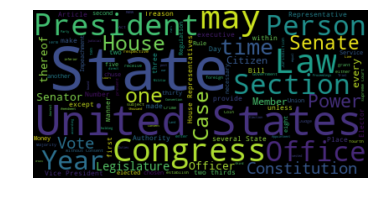

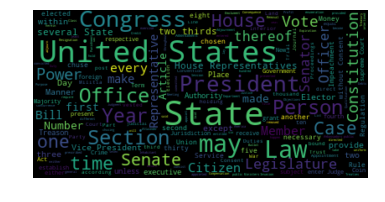

In [6]:
from os import path
from wordcloud import WordCloud

d = path.dirname("/home/manuel/Desktop/Facebook/")

# Read the whole text.
text = open(path.join(d, 'constitution.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
#import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
len(document)

In [ ]:
type(str(text))

In [ ]:
text

In [ ]:
len(X[1000])

## Tensorflow

In [ ]:
X

In [ ]:
# imports
%matplotlib inline
# %pylab osx
import tensorflow as tf

import matplotlib.colors as colors
import matplotlib.cm as cmx

import IPython.display as ipyd
plt.style.use('ggplot')

In [ ]:
dimensions = [64, 32, 16, 8]

In [ ]:
# So the number of features is the second dimension of our inputs matrix, 784
n_features = X.shape[1]

# And we'll create a placeholder in the tensorflow graph that will be able to get any number of n_feature inputs.
X = tf.placeholder(tf.float32, [None, n_features])



In [ ]:
# let's first copy our X placeholder to the name current_input
current_input = X
n_input = n_features

# We're going to keep every matrix we create so let's create a list to hold them all
Ws = []

# We'll create a for loop to create each layer:
for layer_i, n_output in enumerate(dimensions):

    # just like in the last session,
    # we'll use a variable scope to help encapsulate our variables
    # This will simply prefix all the variables made in this scope
    # with the name we give it.
    with tf.variable_scope("encoder/layer/{}".format(layer_i)):

        # Create a weight matrix which will increasingly reduce
        # down the amount of information in the input by performing
        # a matrix multiplication
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))

        b = tf.get_variable(
            name='b',
            shape=[n_output],
            dtype=tf.float32,
            initializer=tf.constant_initializer(0.0))
        
        # Now we'll multiply our input by our transposed W matrix
        # and add the bias
        h = tf.nn.bias_add(
            name='h',
            value=tf.matmul(current_input, W),
            bias=b)

        # And then use a relu activation function on its output
        current_input = tf.nn.relu(h)

        # Finally we'll store the weight matrix so we can build the decoder.
        Ws.append(W)

        # We'll also replace n_input with the current n_output, so that on the
        # next iteration, our new number inputs will be correct.
        n_input = n_output

In [ ]:
print(current_input.get_shape())

In [ ]:
# We'll first reverse the order of our weight matrices
Ws = Ws[::-1]

# then reverse the order of our dimensions
# appending the last layers number of inputs.
dimensions = dimensions[::-1][1:] + [X.shape[1]]
print(dimensions)


In [ ]:
for layer_i, n_output in enumerate(dimensions):
    # we'll use a variable scope again to help encapsulate our variables
    # This will simply prefix all the variables made in this scope
    # with the name we give it.
    with tf.variable_scope("decoder/layer/{}".format(layer_i)):

        # Now we'll grab the weight matrix we created before and transpose it
        # So a 3072 x 784 matrix would become 784 x 3072
        # or a 256 x 64 matrix, would become 64 x 256
        W = tf.transpose(Ws[layer_i])

        b = tf.get_variable(
            name='b',
            shape=[n_output],
            dtype=tf.float32,
            initializer=tf.constant_initializer(0.0))
        
        # Now we'll multiply our input by our transposed W matrix
        # and add the bias
        h = tf.nn.bias_add(
            name='h',
            value=tf.matmul(current_input, W),
            bias=b)

        # And then use a relu activation function on its output
        current_input = tf.nn.relu(h)

        # We'll also replace n_input with the current n_output, so that on the
        # next iteration, our new number inputs will be correct.
        n_input = n_output

In [ ]:
Y = current_input

In [ ]:
# We'll first measure the average difference across every pixel
cost = tf.reduce_mean(tf.squared_difference(X, Y), 1)
print(cost.get_shape())

In [ ]:
cost = tf.reduce_mean(cost)

In [ ]:
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [ ]:
# %%
# We create a session to use the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
# Some parameters for training
batch_size = 100
n_epochs = 5

# We'll try to reconstruct the same first 100 images and show how
# The network does over the course of training.
examples = X[:100]

# We'll store the reconstructions in a list
imgs = []
fig, ax = plt.subplots(1, 1)
for epoch_i in range(n_epochs):
    for batch_X, _ in ds.train.next_batch():
        sess.run(optimizer, feed_dict={X: batch_X - mean_img})
    recon = sess.run(Y, feed_dict={X: examples - mean_img})
    recon = np.clip((recon + mean_img).reshape((-1, 28, 28)), 0, 255)
    img_i = montage(recon).astype(np.uint8)
    imgs.append(img_i)
    ax.imshow(img_i, cmap='gray')
    fig.canvas.draw()
    print(epoch_i, sess.run(cost, feed_dict={X: batch_X - mean_img}))
gif.build_gif(imgs, saveto='ae.gif', cmap='gray')